In [ ]:
import cv2


In [ ]:
import numpy as np
import matplotlib
%matplotlib inline

In [ ]:

I =cv2.imread('download.jpg')
b,g,r = cv2.split(I)       # get b,g,r
I= cv2.merge([r,g,b]) 

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.subplot(1,4,1)
plt.imshow(I[:,:,0],cmap='Reds')
plt.xticks([])
plt.yticks([])
plt.subplot(1,4,2)
plt.imshow(I[:,:,1],cmap='Greens')
plt.xticks([])
plt.yticks([])
plt.subplot(1,4,3)
plt.imshow(I[:,:,2],cmap='Blues')
plt.xticks([])
plt.yticks([])
plt.subplot(1,4,4)
plt.imshow(I)
plt.plot([0 ,101],[0,0],'r')
plt.plot([0 ,0],[0,127],'r')
plt.plot([0 ,101],[127,127],'r')
plt.plot([101 ,101],[0,127],'r')
#plt.plot(I[:,:,0][50,:])
#plt.plot([0,102],[0,0],'o')
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.show()

In [ ]:
hsize=5
sigma=1
blur = cv2.GaussianBlur(I,(hsize,hsize),sigma)
plt.imshow(blur)
f=plt.axis('off')
#print f

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import gridspec
sigma=5
hsize=31
filt=cv2.getGaussianKernel(hsize,sigma,cv2.CV_64F)
filt2d=np.asarray(filt*filt.transpose())
nx,ny=filt2d.shape
X,Y=np.meshgrid(range(nx),range(ny))
#hf = plt.figure()
hf= plt.figure(figsize=(10, 10)) 

gs = gridspec.GridSpec(1, 2, width_ratios=[3, 8],height_ratios=[1,2],wspace=0.0, hspace=0.0) 
#gs.update(top=0)
hf.add_subplot(gs[0])

plt.imshow(filt2d)
plt.title('')
plt.axis('off')
ha = hf.add_subplot(gs[1], projection='3d',)
ha.plot_surface(X, Y, filt2d, rstride=4, cstride=1, cmap=cm.rainbow,
        linewidth=0.01, antialiased=False)
ha.set_zlim(.001,.005)
ax = plt.gca(projection='3d')

ax.set_axis_off()
#plt.subplots_adjust(top=1.14,bottom=.14,hspace=0) 
plt.tight_layout()

In [ ]:
for s in all_axes:
    print s.get_xaxis(
    print s

In [ ]:
out = cv2.filter2D(I, -1, filt)
plt.axis('off')
f=plt.imshow(out)

In [ ]:
out.min()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
sigman=25
sigmag=5
hsize=31
I =cv2.imread('saturn.png')
b,g,r = cv2.split(I)       # get b,g,r
I= cv2.merge([r,g,b]) 
nx,ny,_=I.shape
noise=np.random.randn(nx,ny) * sigman

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(141)
plt.imshow(noise,cmap='gray');
plt.axis('off')
img=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
plt.subplot(142)
plt.imshow(img,cmap='gray');
plt.axis('off')
filt=cv2.getGaussianKernel(hsize,sigmag)
cleaned=cv2.filter2D(img+noise, -1, filt)
plt.subplot(143)
plt.imshow(img+noise,cmap='gray');
plt.axis('off')
plt.subplot(144)
plt.imshow(cleaned,cmap='gray');
plt.axis('off');

In [165]:
import numpy as np
import numpy.ma as ma
def noisy(img,par):
    saltpepper_noise =np.random.randint(256, size=img.shape)
    black = saltpepper_noise < par*256;
    white = saltpepper_noise > (1-par)*256;
    mskw=ma.array(img,mask=white)
    #apply mask then convert to list by filling empties with value255
    xw=ma.fix_invalid(mskw,fill_value=255)
    imgmw=np.asarray(xw.tolist(255))
    mskb=ma.array(imgmw,mask=black)
    xb=ma.fix_invalid(mskb,fill_value=0)
    imgbw=np.asarray(xb.tolist(0),dtype=np.uint8)
    return imgbw

In [166]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
img=cv2.imread('moon.png',0)
imgn=noisy(img,0.02)

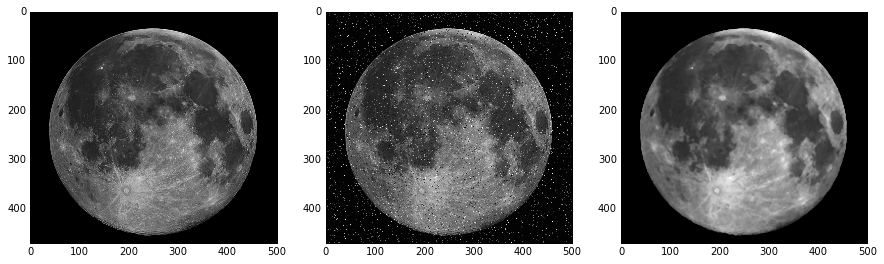

In [167]:
plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(img,cmap='gray')
plt.subplot(132)
plt.imshow(imgn,cmap='gray')

cl=cv2.medianBlur(imgn,5)
plt.subplot(133)
plt.imshow(cl,cmap='gray')
plt.tight_layout
plt.show()